## 🌤️ Ohio Weather Data Script

This Python script retrieves current weather data (temperature, condition, wind speed, and humidity) for a list of cities in Hamilton county, Ohio using the WeatherAPI.


### 📦 Requirements
- `requests`
- `pandas`
- A valid WeatherAPI key
- United States Cities Data

### 🧠 How It Works
- Calls the WeatherAPI for each city
- Extracts weather details
- Stores the data as rows in a DataFrame
- Prints the final DataFrame with cities as rows

### 🧾 Code

### Libraries

In [201]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt

### WeatherAPI details

In [202]:

API_KEY = '3764f87482df4446a4500427251305'
BASE_URL = "http://api.weatherapi.com/v1/current.json"


### Read US cities data from a CSV file and filter out cities located in Hamilton county, Ohio

In [203]:
# Load US cities data
us_cities = pd.read_csv('uscities.csv')

# Check the column names of the DataFrame to ensure correct referencing
print(us_cities.columns)

# Clean column names by stripping any leading/trailing spaces
us_cities.columns = us_cities.columns.str.strip()

# Filter for cities in Hamilton County, Ohio
hamilton_cities_df = us_cities[(us_cities['state_name'] == 'Ohio') & (us_cities['county_name'] == 'Hamilton')]

# Set the maximum number of rows displayed to None (no limit)
pd.set_option('display.max_rows', None)

# Print out the first few rows to verify the filtering worked correctly
print(hamilton_cities_df.head(5))

# Extract relevant columns (City, Latitude, Longitude)
hamilton_cities_lat_lon = hamilton_cities_df[['city', 'lat', 'lng']]

# Display the filtered data with the cities and their coordinates
#print(hamilton_cities_lat_lon)
hamilton_cities_lat_lon

# Filter cities in Hamilton County, Ohio
#hamilton_cities = us_cities[(us_cities['state_name'] == 'Ohio') & (us_cities['county_name'] == 'Hamilton')]['city'].unique()


Index(['city', 'city_ascii', 'state_id', 'state_name', 'county_fips',
       'county_name', 'lat', 'lng', 'population', 'density', 'source',
       'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'],
      dtype='object')
             city   city_ascii state_id state_name  county_fips county_name  \
33     Cincinnati   Cincinnati       OH       Ohio        39061    Hamilton   
2256  Forest Park  Forest Park       OH       Ohio        39061    Hamilton   
2375      Norwood      Norwood       OH       Ohio        39061    Hamilton   
2396    White Oak    White Oak       OH       Ohio        39061    Hamilton   
3098  Sharonville  Sharonville       OH       Ohio        39061    Hamilton   

          lat      lng  population  density source  military  incorporated  \
33    39.1413 -84.5060     1704916   1534.2  shape     False          True   
2256  39.2861 -84.5258       19994   1197.0  shape     False          True   
2375  39.1605 -84.4535       19023   2336.9  shape     

,city,lat,lng
33,Cincinnati,39.1413,-84.5060
2256,Forest Park,39.2861,-84.5258
2375,Norwood,39.1605,-84.4535
2396,White Oak,39.2106,-84.6060
3098,Sharonville,39.2825,-84.4071
3132,Bridgetown,39.1552,-84.6359
3207,Harrison,39.2584,-84.7868
3225,Blue Ash,39.2480,-84.3827
3252,Loveland,39.2677,-84.2733
3482,Monfort Heights,39.1823,-84.6075


In [204]:
# Function to get weather data using latitude and longitude
def get_weather(lat, lon, city_name):
    params = {
        "key": API_KEY,
        "q": f"{lat},{lon}"
    }
    
    response = requests.get(BASE_URL, params=params)
    
    if response.status_code == 200:
        data = response.json()
        weather_info = {
            "City": city_name,
            "Region": data["location"]["region"],
            "Country": data["location"]["country"],
            "Local Time": data["location"]["localtime"],
            "Temperature (C)": data["current"]["temp_c"],
            "Condition": data["current"]["condition"]["text"],
            "Wind (kph)": data["current"]["wind_kph"],
            "Humidity": data["current"]["humidity"],
            "Feels Like (C)": data["current"]["feelslike_c"]
        }
        return weather_info
    else:
        return None

In [205]:
# List to store weather data
weather_data = []

# Loop through each city in Hamilton County and get weather data
for index, row in hamilton_cities_lat_lon.iterrows():
    city_name = row['city']
    lat = row['lat']
    lon = row['lng']
    
    # Get weather info for the city
    weather_info = get_weather(lat, lon, city_name)
    
    if weather_info:
        weather_data.append(weather_info)
    
    # Sleep for 1 second to avoid hitting the API rate limit
    time.sleep(1)

In [206]:
# Set the maximum number of rows displayed to None (no limit)
pd.set_option('display.max_rows', None)
# Convert to DataFrame
weather_df = pd.DataFrame(weather_data)

# Display or save the weather data
weather_df

,City,Region,Country,Local Time,Temperature (C),Condition,Wind (kph),Humidity,Feels Like (C)
0,Cincinnati,Ohio,United States of America,2025-05-13 21:12,18.9,Light rain,4.7,96,18.9
1,Forest Park,Ohio,United States of America,2025-05-13 21:12,17.8,Overcast,5.0,100,17.8
2,Norwood,Ohio,United States of America,2025-05-13 21:12,18.9,Light rain,4.7,96,18.9
3,White Oak,Ohio,United States of America,2025-05-13 21:12,17.8,Overcast,6.5,100,17.8
4,Sharonville,Ohio,United States of America,2025-05-13 21:12,17.8,Overcast,4.0,100,17.8
5,Bridgetown,Ohio,United States of America,2025-05-13 21:13,17.8,Overcast,6.5,100,17.8
6,Harrison,Ohio,United States of America,2025-05-13 21:13,17.8,Overcast,6.5,100,17.8
7,Blue Ash,Ohio,United States of America,2025-05-13 21:13,17.8,Overcast,4.0,100,17.8
8,Loveland,Ohio,United States of America,2025-05-13 21:13,19.4,Light rain,3.6,76,19.4
9,Monfort Heights,Ohio,United States of America,2025-05-13 21:13,17.8,Overcast,6.5,100,17.8


In [207]:
# Save the DataFrame to a CSV file
weather_df.to_csv('hamilton_county_weather.csv', index=False)

print(f"Weather data for Hamilton County cities has been saved to 'hamilton_county_weather.csv'")

Weather data for Hamilton County cities has been saved to 'hamilton_county_weather.csv'


In [208]:
# Display the DataFrame with weather information for cities in Hamilton County
#weather_df

# Save the DataFrame to an Excel file
#weather_df.to_excel('hamilton_county_weather.xlsx', index=False)


## Data Visualization

### 1. Bar Chart: 💨 Wind Speed by City

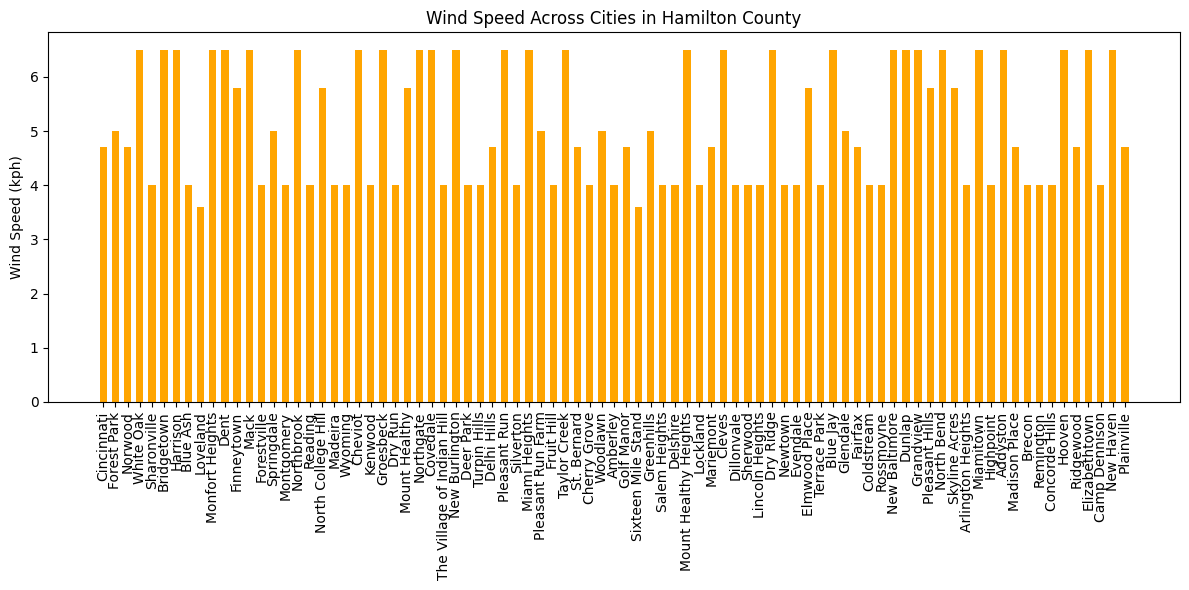

In [209]:
plt.figure(figsize=(12,6))
plt.bar(weather_df['City'], weather_df['Wind (kph)'], color='orange',width=0.6)
plt.xticks(rotation=90)
plt.ylabel('Wind Speed (kph)')
plt.title('Wind Speed Across Cities in Hamilton County')
plt.tight_layout()
plt.show()


### 2. Bar chart - 💨 3. Humidity Distribution

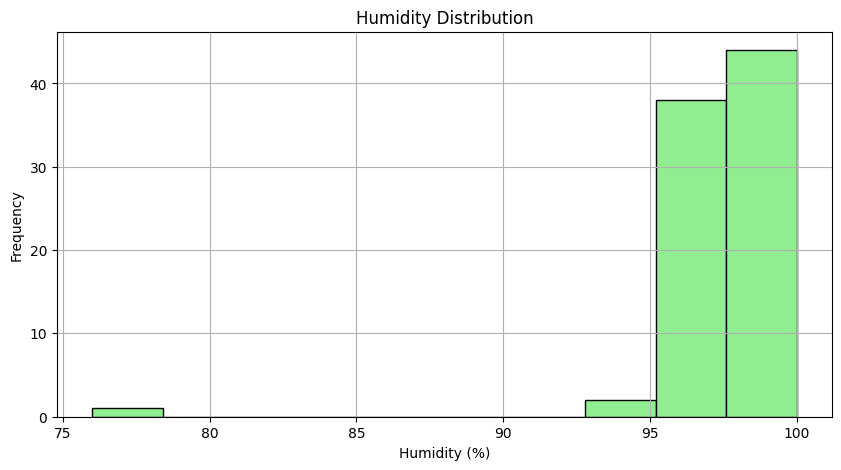

In [210]:
plt.figure(figsize=(10, 5))
plt.hist(weather_df['Humidity'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### 3. 💨 Wind Speed vs City (Sorted)

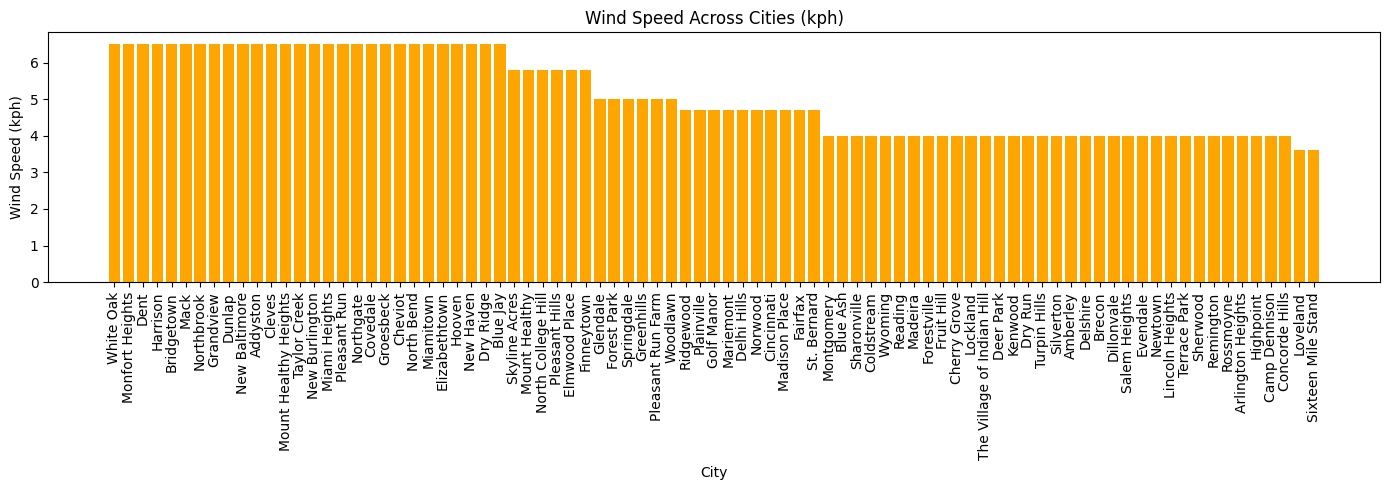

In [211]:
sorted_df = weather_df.sort_values(by='Wind (kph)', ascending=False)

plt.figure(figsize=(14, 5))
plt.bar(sorted_df['City'], sorted_df['Wind (kph)'], color='orange')
plt.xticks(rotation=90)
plt.title('Wind Speed Across Cities (kph)')
plt.xlabel('City')
plt.ylabel('Wind Speed (kph)')
plt.tight_layout()
plt.show()


### 4. Pie Chart - 🌦️  Visualizing Weather Conditions 
See how many locations report the same condition.

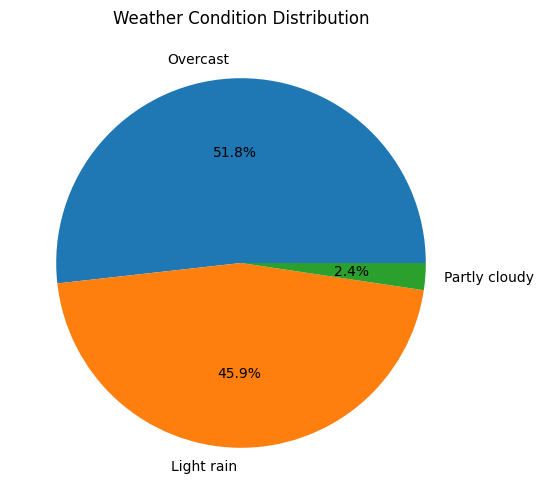

In [212]:
condition_counts = weather_df['Condition'].value_counts()

# Pie chart
condition_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Weather Condition Distribution')
plt.ylabel('')
plt.show()

### 5. 💧 Scatter Plot: Temperature vs. Humidity

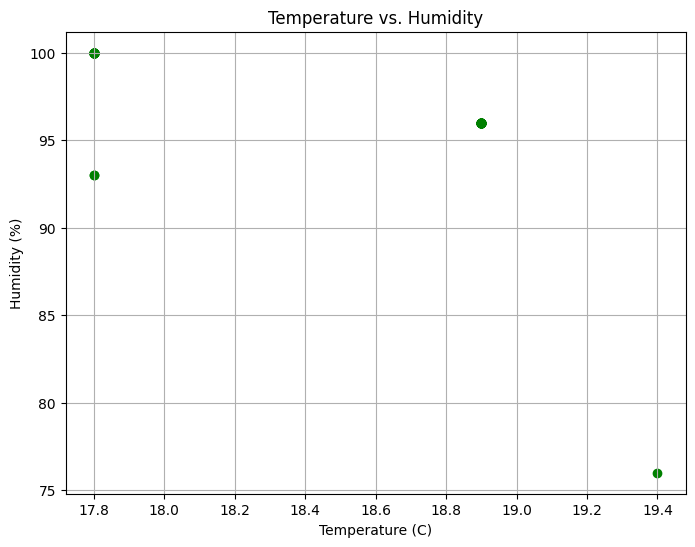

In [213]:

plt.figure(figsize=(8,6))
plt.scatter(weather_df['Temperature (C)'], weather_df['Humidity'], color='green')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs. Humidity')
plt.grid(True)
plt.show()
